In [30]:
# 一个财富分配游戏：
# 房间里有100个人，每人都有100元钱，他们在玩一个游戏。每轮游戏中，每个人都要拿出一元钱随机给另一个人，最后这100个人的财富分布是怎样的？

# 研究问题：
# 1、财富分配模型
# 模型假设：
# ① 每个人初始基金100元
# ② 从18岁到65岁，每天玩一次，简化运算按照一共玩17000轮
# ③ 每天拿出一元钱，并且随机分配给另一个人
# ④ 当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱
# 要求：
# ① 构建模型模拟（这里需要跑17000轮）
# ② 绘制柱状图，查看该轮财富情况
#    ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
#    ** 制图分两个情况绘制：不排序绘制、每轮按照财富值排序绘制
#    ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
#    ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
#    ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
# ③ 查看最后财富分配数据是什么分布？
# ④ 最富有的人相比于初始财富，翻了多少倍？
# ⑤ 10%的人掌握着多少的财富？30%的人掌握着多少的财富？又有百分之多少人财富缩水至100元以下了？
# 提示：
# ① 首先，模拟第一轮游戏分配，不考虑某人财富值降到0元的情况
# ② 其次，仍然模拟第一轮游戏分配，但考虑某人的财富值降到0元时的情况
# ③ 构建模型
# ④ 运行模型，先试运行100条/1000条，再运行17000
# ⑤ 制图

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore') 

import time

id = pd.Series(x for x in range(1,101))
_data = pd.DataFrame({0:100 for i in range(100)},index=id)
s = pd.Series(np.random.choice(id,100))
data_s=pd.DataFrame({'raise_0':s.value_counts()})
data = pd.merge(_data,data_s,left_index=True,right_index=True,how='left')
data.fillna(0,inplace=True)
data['reduce_0']=1
data[1] = data[0]-data['reduce_0']+data['raise_0']

# 第一轮财富分配结果
data

,0,raise_0,reduce_0,1
1,100,1.0,1,100.0
2,100,3.0,1,102.0
3,100,0.0,1,99.0
4,100,0.0,1,99.0
5,100,0.0,1,99.0
...,...,...,...,...
96,100,2.0,1,101.0
97,100,3.0,1,102.0
98,100,1.0,1,100.0
99,100,1.0,1,100.0


In [42]:
# 构建模型

def game(data,i):
    if len(data[data[i-1]==0])>0:   # 出现财富值为0
        data['reduce_i']=1
        data.loc[data[i-1]==0,'reduce_i']=0
        s = pd.Series(np.random.choice(id,100-len(data[data[i-1]==0])))
        data_s=pd.DataFrame({'raise_i':s.value_counts()})
        data = pd.merge(data,data_s,left_index=True,right_index=True,how='left')
        data['raise_i'].fillna(0,inplace=True)
        data[i]= data[i-1]-data['reduce_i']+data['raise_i']
    else:
        data['reduce_i']=1
        s = pd.Series(np.random.choice(id,100))
        data_s=pd.DataFrame({'raise_i':s.value_counts()})
        data = pd.merge(data,data_s,left_index=True,right_index=True,how='left')
        data['raise_i'].fillna(0,inplace=True)
        data[i]= data[i-1]-data['reduce_i']+data['raise_i']
    return data[i]
game_re=pd.DataFrame()
starttime=time.time()
for r in range(1,17001):
    data[r]=game(data,r)
endtime=time.time()
print('模型用时%i秒'%(endtime-starttime))
data.head()
    

模型用时594秒


,0,raise_0,reduce_0,1,reduce_i,2,3,4,5,6,...,16991,16992,16993,16994,16995,16996,16997,16998,16999,17000
1,100,1.0,1,99.0,1,99.0,100.0,99.0,98.0,97.0,...,79.0,79.0,79.0,79.0,79.0,79.0,79.0,78.0,78.0,78.0
2,100,3.0,1,100.0,1,99.0,99.0,99.0,99.0,98.0,...,18.0,19.0,18.0,17.0,16.0,16.0,16.0,18.0,19.0,19.0
3,100,0.0,1,100.0,1,99.0,98.0,97.0,97.0,96.0,...,104.0,106.0,106.0,106.0,107.0,106.0,105.0,105.0,106.0,105.0
4,100,0.0,1,99.0,1,98.0,97.0,97.0,96.0,95.0,...,59.0,60.0,59.0,59.0,59.0,60.0,60.0,59.0,59.0,60.0
5,100,0.0,1,101.0,1,100.0,100.0,99.0,99.0,99.0,...,48.0,47.0,46.0,45.0,44.0,47.0,47.0,46.0,45.0,45.0


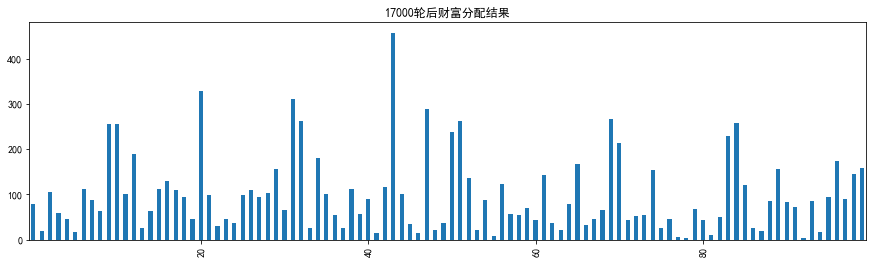

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
data[17000].plot(kind='bar',figsize=(15,4),xticks=[20,40,60,80],title='17000轮后财富分配结果')
# plt.xticks([20,40,60,80])

In [99]:
round_17000 = pd.DataFrame({'money':data[17000]}).sort_values('money',ascending=False).reset_index(drop=True)
round_17000['cumsum']=round_17000['money'].cumsum()
round_17000['percentage'] = round_17000['cumsum']/round_17000['money'].sum()
top10_per = round_17000.loc[9,'percentage']
top30_per = round_17000.loc[29,'percentage']
less_100 = len(round_17000[round_17000['money']<100])/100
print('百分之10的人掌握了%.2f%%的财富'%(top10_per*100),'\n------------')
print('百分之30的人掌握了%.2f%%的财富'%(top30_per*100),'\n------------')
print('财富值少于100的人占%.2f%%'%(less_100*100))

百分之10的人掌握了29.44%的财富 
------------
百分之30的人掌握了61.03%的财富 
------------
财富值少于100的人占62.00%


In [101]:
# 2、在允许借贷情况下，研究以下问题
# 和初始模型的区别：
# 允许借贷意味着可以找亲友、银行、投资人借贷 → 资产为负时，仍然参与游戏
# 要求：
# ① 构建模型模拟，再次模拟财富分配情况
#    ** 最富有的人相比于初始财富，翻了多少倍？
#    ** 10%的人掌握着多少的财富？30%的人掌握着多少的财富？又有百分之多少人财富缩水至100元以下了？
# ② 绘制柱状图，查看该轮财富情况
#    ** 横轴标签代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
#    ** 这里只需要每轮按照财富值排序绘制
#    ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
#    ** 100至1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
#    ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
# ③ 游戏次数与财富分布的标准差的情况，绘图来表示
#    ** 这里用允许借贷情况下模拟的结果
#    ** 横坐标为游戏次数（总共17000次），纵坐标为财富分配标准差
#    ** 绘制折线图
# ④ 玩家从18岁开始，在经过17年后为35岁，这个期间共进行游戏6200次左右，则此刻查看财富情况，将财富值为负的标记成“破产”，通过图表研究
#    该类玩家在今后的游戏中能否成功“逆袭”（财富值从负到正为逆袭）、
#    ** 这里绘制柱状图 → 6200至17000轮，按照每500轮绘制一次柱状图
# 提示：
# ① 该模型只需要将初始模型中，“财富小于零时无需拿钱给别人”的条件删掉即可
# ② 最后绘制柱状图时，需要将负债的玩家标红，这里可以通过截取dataframe之后，给与color字段来设置颜色

# 构建模型

def game2(data,i):
    data['reduce_i']=1
    s = pd.Series(np.random.choice(id,100))
    data_s=pd.DataFrame({'raise_i':s.value_counts()})
    data = pd.merge(data,data_s,left_index=True,right_index=True,how='left')
    data['raise_i'].fillna(0,inplace=True)
    data[i]= data[i-1]-data['reduce_i']+data['raise_i']
    return data[i]
game_re=pd.DataFrame()
starttime=time.time()
for r in range(1,17001):
    data[r]=game(data,r)
endtime=time.time()
print('模型用时%i秒'%(endtime-starttime))
data.head()


模型用时223秒


,0,1,2,3,4,5,6,7,8,9,...,16992,16993,16994,16995,16996,16997,16998,16999,17000,reduce_i
1,100,101.0,102.0,102.0,102.0,102.0,102.0,102.0,101.0,101.0,...,6.0,5.0,6.0,7.0,8.0,7.0,6.0,7.0,7.0,1
2,100,99.0,99.0,99.0,100.0,100.0,101.0,100.0,99.0,100.0,...,222.0,223.0,225.0,224.0,225.0,224.0,224.0,223.0,224.0,1
3,100,99.0,98.0,99.0,98.0,98.0,99.0,100.0,99.0,99.0,...,-109.0,-108.0,-108.0,-109.0,-109.0,-110.0,-110.0,-111.0,-110.0,1
4,100,99.0,100.0,100.0,99.0,99.0,98.0,98.0,97.0,96.0,...,-66.0,-67.0,-66.0,-65.0,-63.0,-64.0,-65.0,-66.0,-67.0,1
5,100,99.0,98.0,97.0,98.0,98.0,97.0,97.0,96.0,96.0,...,203.0,203.0,203.0,204.0,204.0,203.0,202.0,204.0,206.0,1


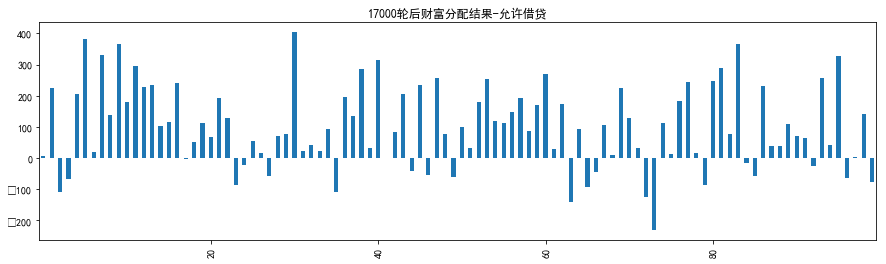

In [107]:
plt.rcParams['axes.unicode_minus'] 
data[17000].plot(kind='bar',figsize=(15,4),xticks=[20,40,60,80],title='17000轮后财富分配结果-允许借贷')

In [106]:
round_17000_1 = pd.DataFrame({'money':data[17000]}).sort_values('money',ascending=False).reset_index(drop=True)
round_17000_1['cumsum']=round_17000_1['money'].cumsum()
round_17000_1['percentage'] = round_17000_1['cumsum']/round_17000_1['money'].sum()
top10_percent = round_17000_1.loc[9,'percentage']
top30_percent = round_17000_1.loc[29,'percentage']
lessthan_100 = len(round_17000_1[round_17000_1['money']<100])/100
print('百分之10的人掌握了%.2f%%的财富'%(top10_percent*100),'\n------------')
print('百分之30的人掌握了%.2f%%的财富'%(top30_percent*100),'\n------------')
print('财富值少于100的人占%.2f%%'%(lessthan_100*100))

百分之10的人掌握了33.63%的财富 
------------
百分之30的人掌握了78.65%的财富 
------------
财富值少于100的人占52.00%


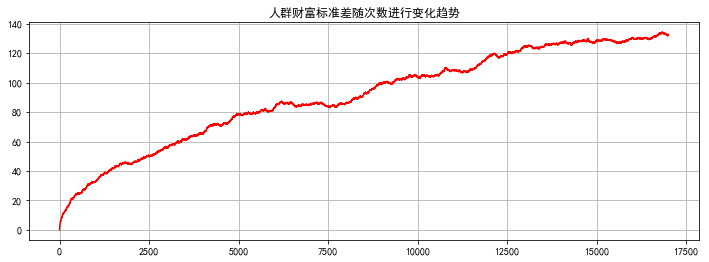

In [115]:
game_result = data.T
game_result_std=game_result.std(axis=1)
game_result_std.drop(['reduce_i'],inplace=True)
game_result_std.plot(color='red',figsize=(12,4),grid=True,title='人群财富标准差随次数进行变化趋势')